In [16]:
import globals as gl
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')

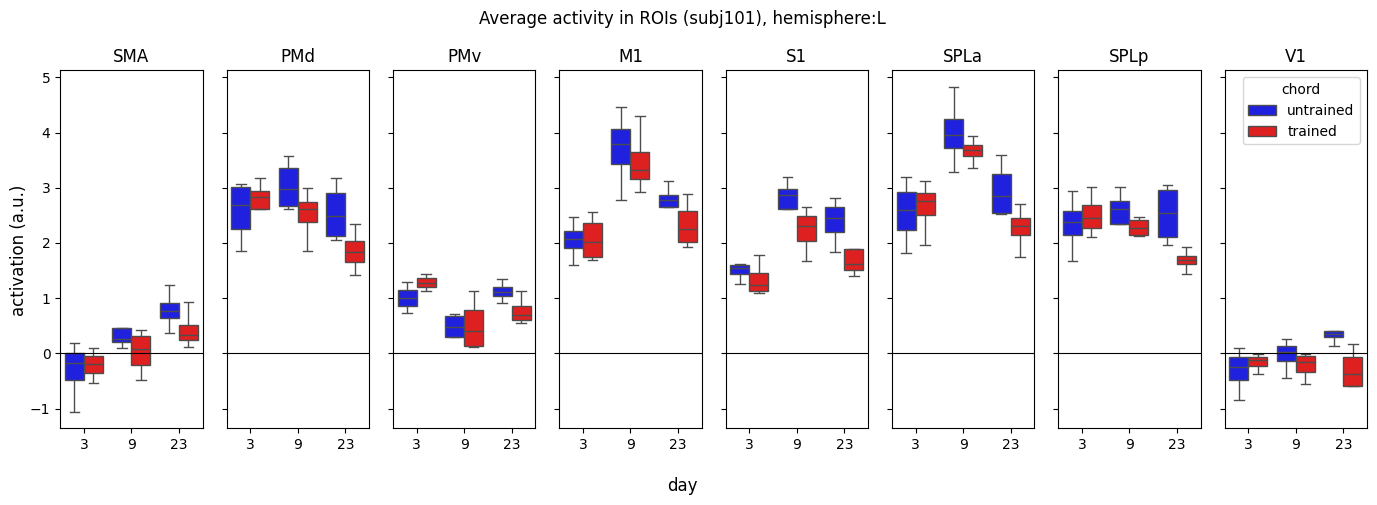

In [17]:
glm = 1
experiment = 'efc4'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
sn = 101
H = 'L'
# conditions = list(gl.regressor_mapping.keys())[0:13]

df_con = pd.read_csv(os.path.join(gl.baseDir, experiment, f'glm{glm}','ROI.con.avg.tsv'), sep='\t')
df_con = df_con[df_con.sn == sn]
# df_con = df_con[df_con['condition'].isin(conditions)]
# df_con = df_con.groupby(['condition', 'roi', 'Hem', 'sn']).mean(numeric_only=True).reset_index()

fig, axs = plt.subplots(1, len(rois), sharey=True, sharex=True, figsize=(14, 5))

for r, roi in enumerate(rois):

    if r==len(rois)-1:
        sns.boxplot(df_con[(df_con['roi'] == roi) & (df_con['Hem'] == H)],
                    ax=axs[r],
                    y='con',
                    x='day',
                    hue='chord',
                    palette=['blue', 'red'],
                    showfliers=False,
                    )
    else:
        sns.boxplot(df_con[(df_con['roi'] == roi) & (df_con['Hem'] == H)],
                    ax=axs[r],
                    y='con',
                    x='day',
                    hue='chord',
                    palette=['blue', 'red'],
                    showfliers=False,
                    legend=False
                    )

    axs[r].axhline(0, ls='-', color='k', lw=.8)
    axs[r].set_title(roi)
    axs[r].set_ylabel('')
    axs[r].set_xlabel('')
    # axs[r].set_xticks(axs[r].get_xticks())
    # axs[r].set_xticklabels(axs[r].get_xticklabels(), rotation=90)

fig.supylabel('activation (a.u.)')
fig.supxlabel('day')
fig.suptitle(f'Average activity in ROIs (subj{sn}), hemisphere:{H}')
fig.tight_layout()